In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
# conda install -c conda-forge mlxtend

In [2]:
groceries = []

In [3]:
import csv 

with open('groceries.csv','r') as f:
    reader = csv.reader(f,delimiter=';')
    groceries = f.read()

In [4]:
groceries

'citrus fruit,semi-finished bread,margarine,ready soups\ntropical fruit,yogurt,coffee\nwhole milk\npip fruit,yogurt,cream cheese ,meat spreads\nother vegetables,whole milk,condensed milk,long life bakery product\nwhole milk,butter,yogurt,rice,abrasive cleaner\nrolls/buns\nother vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer)\npot plants\nwhole milk,cereals\ntropical fruit,other vegetables,white bread,bottled water,chocolate\ncitrus fruit,tropical fruit,whole milk,butter,curd,yogurt,flour,bottled water,dishes\nbeef\nfrankfurter,rolls/buns,soda\nchicken,tropical fruit\nbutter,sugar,fruit/vegetable juice,newspapers\nfruit/vegetable juice\npackaged fruit/vegetables\nchocolate\nspecialty bar\nother vegetables\nbutter milk,pastry\nwhole milk\ntropical fruit,cream cheese ,processed cheese,detergent,newspapers\ntropical fruit,root vegetables,other vegetables,frozen dessert,rolls/buns,flour,sweet spreads,salty snack,waffles,candy,bathroom cleaner\nbottled water,canned beer\nyogur

In [5]:
# splitting the data into separate transactions using separator as "\n"
groceries = groceries.split("\n")
groceries_list = []
for i in groceries:
    groceries_list.append(i.split(","))

In [6]:
groceries_list

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

In [7]:
all_groceries_list = [i for item in groceries_list for i in item]
from collections import Counter

In [8]:
item_frequencies = Counter(all_groceries_list)
# after sorting
#item_frequencies = sorted(item_frequencies.items(),key = lambda x:x[1])
item_frequencies = sorted(item_frequencies.items(),key = lambda x:x[1])

In [9]:
# Storing frequencies and items in separate variables 
frequencies = list(reversed([i[1] for i in item_frequencies]))
items = list(reversed([i[0] for i in item_frequencies]))

In [10]:
# Purpose of converting all list into Series object Coz to treat each list element as entire element not to separate 
groceries_series  = pd.DataFrame(pd.Series(groceries_list))
groceries_series = groceries_series.iloc[:9835,:] # removing the last empty transaction

In [11]:
groceries_series.columns = ["transactions"]

In [12]:
# creating a dummy columns for the each item in each transactions ... Using column names as item name
X = groceries_series['transactions'].str.join(sep='*').str.get_dummies(sep='*')

In [13]:
X

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
frequent_itemsets = apriori(X, min_support=0.005, max_len=3,use_colnames = True)

In [15]:
frequent_itemsets

,support,itemsets
0,0.008033,(Instant food products)
1,0.033452,(UHT-milk)
2,0.017692,(baking powder)
3,0.052466,(beef)
4,0.033249,(berries)
...,...,...
984,0.010473,"(soda, whole milk, yogurt)"
985,0.007931,"(tropical fruit, whipped/sour cream, whole milk)"
986,0.006202,"(tropical fruit, whipped/sour cream, yogurt)"
987,0.015150,"(tropical fruit, whole milk, yogurt)"


In [16]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled water),(UHT-milk),0.110524,0.033452,0.007321,0.066237,1.980074,0.003624,1.035111
1,(UHT-milk),(bottled water),0.033452,0.110524,0.007321,0.218845,1.980074,0.003624,1.138668
2,(other vegetables),(UHT-milk),0.193493,0.033452,0.008134,0.042039,1.256694,0.001662,1.008964
3,(UHT-milk),(other vegetables),0.033452,0.193493,0.008134,0.243161,1.256694,0.001662,1.065626
4,(rolls/buns),(UHT-milk),0.183935,0.033452,0.006406,0.034826,1.041071,0.000253,1.001423
...,...,...,...,...,...,...,...,...,...
2783,"(whipped/sour cream, yogurt)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719
2784,"(whole milk, yogurt)",(whipped/sour cream),0.056024,0.071683,0.010880,0.194192,2.709053,0.006864,1.152033
2785,(whipped/sour cream),"(whole milk, yogurt)",0.071683,0.056024,0.010880,0.151773,2.709053,0.006864,1.112881
2786,(whole milk),"(whipped/sour cream, yogurt)",0.255516,0.020742,0.010880,0.042579,2.052747,0.005580,1.022807


In [17]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
699,(ham),(white bread),0.026029,0.042095,0.005084,0.195312,4.639851,0.003988,1.190407
698,(white bread),(ham),0.042095,0.026029,0.005084,0.120773,4.639851,0.003988,1.107758
1491,(whipped/sour cream),"(other vegetables, butter)",0.071683,0.020031,0.005796,0.080851,4.036397,0.004360,1.066171
1486,"(other vegetables, butter)",(whipped/sour cream),0.020031,0.071683,0.005796,0.289340,4.036397,0.004360,1.306275
732,(root vegetables),(herbs),0.108998,0.016268,0.007016,0.064366,3.956477,0.005243,1.051406
733,(herbs),(root vegetables),0.016268,0.108998,0.007016,0.431250,3.956477,0.005243,1.566596
2117,"(other vegetables, root vegetables)",(onions),0.047382,0.031012,0.005694,0.120172,3.875044,0.004225,1.101338
2120,(onions),"(other vegetables, root vegetables)",0.031012,0.047382,0.005694,0.183607,3.875044,0.004225,1.166862
1620,"(citrus fruit, pip fruit)",(tropical fruit),0.013828,0.104931,0.005592,0.404412,3.854060,0.004141,1.502831
1621,(tropical fruit),"(citrus fruit, pip fruit)",0.104931,0.013828,0.005592,0.053295,3.854060,0.004141,1.041688


In [18]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled water),(UHT-milk),0.110524,0.033452,0.007321,0.066237,1.980074,0.003624,1.035111
1,(UHT-milk),(bottled water),0.033452,0.110524,0.007321,0.218845,1.980074,0.003624,1.138668
2,(other vegetables),(UHT-milk),0.193493,0.033452,0.008134,0.042039,1.256694,0.001662,1.008964
3,(UHT-milk),(other vegetables),0.033452,0.193493,0.008134,0.243161,1.256694,0.001662,1.065626
4,(rolls/buns),(UHT-milk),0.183935,0.033452,0.006406,0.034826,1.041071,0.000253,1.001423
...,...,...,...,...,...,...,...,...,...
2783,"(whipped/sour cream, yogurt)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719
2784,"(whole milk, yogurt)",(whipped/sour cream),0.056024,0.071683,0.010880,0.194192,2.709053,0.006864,1.152033
2785,(whipped/sour cream),"(whole milk, yogurt)",0.071683,0.056024,0.010880,0.151773,2.709053,0.006864,1.112881
2786,(whole milk),"(whipped/sour cream, yogurt)",0.255516,0.020742,0.010880,0.042579,2.052747,0.005580,1.022807


In [20]:
import matplotlib.pyplot as plt

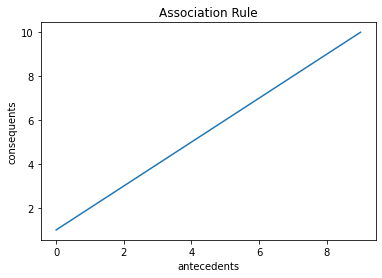

In [21]:
plt.plot(range(1, 11))
plt.title('Association Rule')
plt.xlabel('antecedents')
plt.ylabel('consequents')
plt.show()

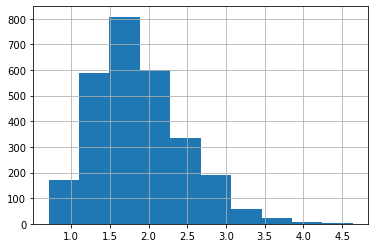

In [22]:
rules['lift'].hist()

In [28]:
frequent_itemsets = apriori(X, min_support=0.009, max_len=3,use_colnames = True)

In [29]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(baking powder),(whole milk),0.017692,0.255516,0.009253,0.522989,2.046793,0.004732,1.560725
1,(whole milk),(baking powder),0.255516,0.017692,0.009253,0.036212,2.046793,0.004732,1.019216
2,(other vegetables),(beef),0.193493,0.052466,0.019725,0.101944,1.943066,0.009574,1.055095
3,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416
4,(rolls/buns),(beef),0.183935,0.052466,0.013625,0.074074,1.411858,0.003975,1.023337
...,...,...,...,...,...,...,...,...,...
815,"(whipped/sour cream, yogurt)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719
816,"(whole milk, yogurt)",(whipped/sour cream),0.056024,0.071683,0.010880,0.194192,2.709053,0.006864,1.152033
817,(whipped/sour cream),"(whole milk, yogurt)",0.071683,0.056024,0.010880,0.151773,2.709053,0.006864,1.112881
818,(whole milk),"(whipped/sour cream, yogurt)",0.255516,0.020742,0.010880,0.042579,2.052747,0.005580,1.022807


In [30]:
#To eliminate Redudancy in Rules
def to_list(i):
    return (sorted(list(i)))

In [32]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

In [33]:
ma_X = ma_X.apply(sorted)

In [34]:
rules_sets = list(ma_X)

In [38]:
rules_sets

[['baking powder', 'whole milk'],
 ['baking powder', 'whole milk'],
 ['beef', 'other vegetables'],
 ['beef', 'other vegetables'],
 ['beef', 'rolls/buns'],
 ['beef', 'rolls/buns'],
 ['beef', 'root vegetables'],
 ['beef', 'root vegetables'],
 ['beef', 'whole milk'],
 ['beef', 'whole milk'],
 ['beef', 'yogurt'],
 ['beef', 'yogurt'],
 ['berries', 'other vegetables'],
 ['berries', 'other vegetables'],
 ['berries', 'whipped/sour cream'],
 ['berries', 'whipped/sour cream'],
 ['berries', 'whole milk'],
 ['berries', 'whole milk'],
 ['berries', 'yogurt'],
 ['berries', 'yogurt'],
 ['bottled beer', 'bottled water'],
 ['bottled beer', 'bottled water'],
 ['bottled beer', 'other vegetables'],
 ['bottled beer', 'other vegetables'],
 ['bottled beer', 'rolls/buns'],
 ['bottled beer', 'rolls/buns'],
 ['bottled beer', 'root vegetables'],
 ['bottled beer', 'root vegetables'],
 ['bottled beer', 'soda'],
 ['bottled beer', 'soda'],
 ['bottled beer', 'whole milk'],
 ['bottled beer', 'whole milk'],
 ['bottled b

In [35]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [36]:
# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

In [37]:
rules_no_redudancy

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
622,"(fruit/vegetable juice, whole milk)",(yogurt),0.026640,0.139502,0.009456,0.354962,2.544497,0.005740,1.334027
16,(berries),(whole milk),0.033249,0.255516,0.011795,0.354740,1.388328,0.003299,1.153774
146,(citrus fruit),(shopping bags),0.082766,0.098526,0.009761,0.117936,1.197009,0.001607,1.022006
598,"(curd, whole milk)",(yogurt),0.026131,0.139502,0.010066,0.385214,2.761356,0.006421,1.399671
498,(soda),(yogurt),0.174377,0.139502,0.027351,0.156851,1.124368,0.003025,1.020577
...,...,...,...,...,...,...,...,...,...
422,(pork),(root vegetables),0.057651,0.108998,0.013625,0.236332,2.168210,0.007341,1.166739
396,(pastry),(tropical fruit),0.088968,0.104931,0.013218,0.148571,1.415891,0.003883,1.051255
338,(newspapers),(yogurt),0.079817,0.139502,0.015353,0.192357,1.378883,0.004219,1.065443
408,(pip fruit),(shopping bags),0.075648,0.098526,0.009354,0.123656,1.255063,0.001901,1.028676


In [39]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,(berries),(whipped/sour cream),0.033249,0.071683,0.009049,0.272171,3.796886,0.006666,1.275461
640,"(tropical fruit, other vegetables)",(pip fruit),0.035892,0.075648,0.009456,0.263456,3.482649,0.006741,1.254985
682,"(tropical fruit, other vegetables)",(root vegetables),0.035892,0.108998,0.012303,0.342776,3.144780,0.008391,1.355705
562,"(tropical fruit, other vegetables)",(citrus fruit),0.035892,0.082766,0.009049,0.252125,3.046248,0.006079,1.226454
6,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366
346,(onions),(root vegetables),0.031012,0.108998,0.009456,0.304918,2.797452,0.006076,1.281865
598,"(curd, whole milk)",(yogurt),0.026131,0.139502,0.010066,0.385214,2.761356,0.006421,1.399671
86,(butter),(domestic eggs),0.055414,0.063447,0.009659,0.174312,2.747368,0.006144,1.134270
186,(whipped/sour cream),(curd),0.071683,0.053279,0.010473,0.146099,2.742150,0.006654,1.108701
556,"(other vegetables, root vegetables)",(citrus fruit),0.047382,0.082766,0.010371,0.218884,2.644626,0.006450,1.174262


In [54]:
rules['antecedents'] = rules_no_redudancy['antecedents'].apply(lambda a: ','.join(list(a))) 
rules['consequents'] = rules_no_redudancy['consequents'].apply(lambda a: ','.join(list(a)))

In [55]:
print(rules_no_redudancy[['antecedents','consequents']])

                             antecedents        consequents
622  (fruit/vegetable juice, whole milk)           (yogurt)
16                             (berries)       (whole milk)
146                       (citrus fruit)    (shopping bags)
598                   (curd, whole milk)           (yogurt)
498                               (soda)           (yogurt)
..                                   ...                ...
422                               (pork)  (root vegetables)
396                             (pastry)   (tropical fruit)
338                         (newspapers)           (yogurt)
408                          (pip fruit)    (shopping bags)
150                     (tropical fruit)     (citrus fruit)

[310 rows x 2 columns]


In [51]:
# Transform antecedent, consequent, and support columns into matrix
support_table = rules_no_redudancy.pivot(index='consequents', columns='antecedents', values='support')

In [52]:
import seaborn as sns

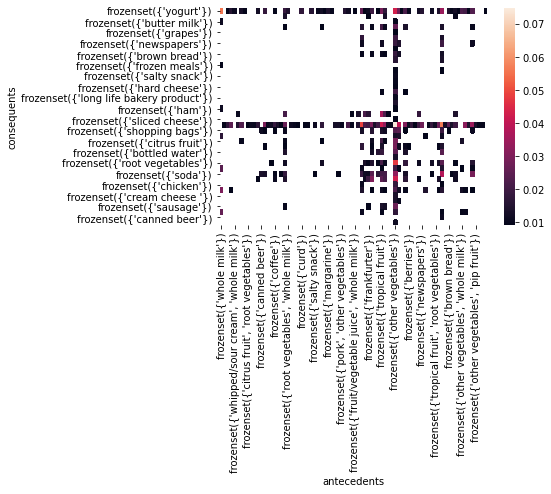

In [53]:
# Generate heatmap
sns.heatmap(support_table)

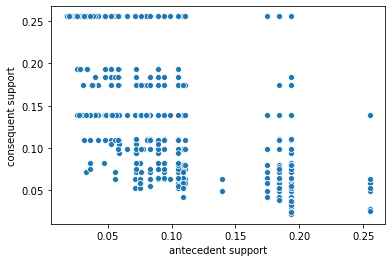

In [49]:
sns.scatterplot(x="antecedent support", y="consequent support", data=rules_no_redudancy)
  

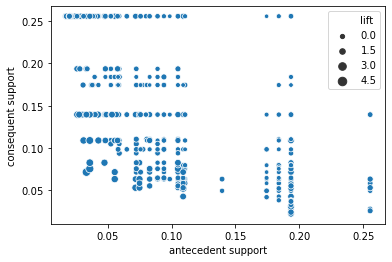

In [50]:
#adding a third Matrix
sns.scatterplot(x="antecedent support", y="consequent support",
size="lift", data=rules_no_redudancy)